<a href="https://colab.research.google.com/github/YashGitt10/BTP/blob/main/btp_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape: (500, 30)
Target column: Overall how good was the platform?

Target distribution:
 count    5.000000e+02
mean     3.073097e-16
std      1.000000e+00
min     -2.303919e+00
25%     -9.948742e-01
50%      3.141708e-01
75%      3.141708e-01
max      2.932261e+00
Name: Overall how good was the platform?, dtype: float64
Train shape: (400, 20) Test shape: (100, 20)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 256)            │         5,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,129 (188.00 KB)

 Trainable params: 47,361 (185.00 KB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 1.6665 - mae: 1.0442 - rmse: 1.2860 - val_loss: 0.7871 - val_mae: 0.7491 - val_rmse: 0.8872 - learning_rate: 0.0010
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9211 - mae: 0.7514 - rmse: 0.9583 - val_loss: 0.7600 - val_mae: 0.7376 - val_rmse: 0.8718 - learning_rate: 0.0010
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6726 - mae: 0.6270 - rmse: 0.8192 - val_loss: 0.7187 - val_mae: 0.7112 - val_rmse: 0.8478 - learning_rate: 0.0010
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4846 - mae: 0.5486 - rmse: 0.6955 - val_loss: 0.6894 - val_mae: 0.6952 - val_rmse: 0.8303 - learning_rate: 0.0010
Epoch 5/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3640 - mae: 0.4845 - rmse: 0.6001 - val_loss: 0.6478 - val_mae: 0.6737 - val_rmse: 0.8049 - learning_rate: 0.0010
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4090 - mae: 0.4985 - rmse: 0.6385 - val_loss: 0.6308 - val_mae:

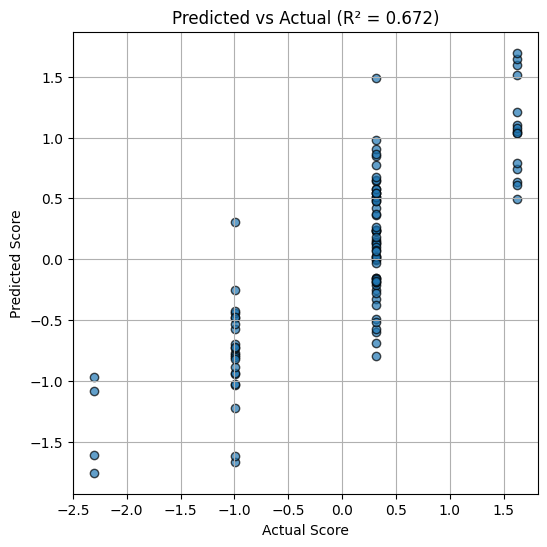

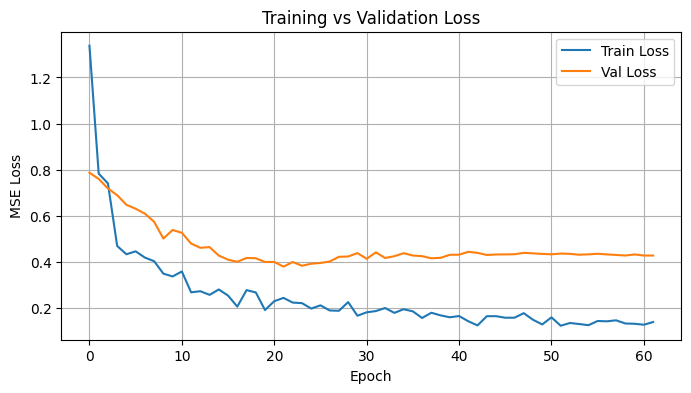


✅ Saved model as 'MLP_SeverityIndex_FINAL_Optimized.h5'
✅ Saved scaler as 'scaler_final.pkl' and PCA as 'pca_final.pkl'


In [17]:
# ============================================================
# Machine Learning-based Usability Evaluation (Optimized MLP)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.optimizers import Adam

# ------------------------------
# 1. Load Data
# ------------------------------
data_path = "swayam_google_form.csv"
df = pd.read_csv(data_path)

print("Shape:", df.shape)
target_col = df.columns[-1]
X = df.drop(columns=[target_col])
y = df[target_col].astype(float)

# Normalize target for smoother learning (important!)
y = (y - y.mean()) / y.std()

print("Target column:", target_col)
print("\nTarget distribution:\n", y.describe())

# ------------------------------
# 2. Preprocessing
# ------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA (reduce slightly to remove collinearity noise)
pca = PCA(n_components=20, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, shuffle=True
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# ------------------------------
# 3. Model Definition
# ------------------------------
def build_mlp(input_dim):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='linear')
    ])
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=[tf.keras.metrics.MeanAbsoluteError(name='mae'),
                 tf.keras.metrics.RootMeanSquaredError(name='rmse')]
    )
    return model

model = build_mlp(X_train.shape[1])
model.summary()

# ------------------------------
# 4. Training Callbacks
# ------------------------------
es = callbacks.EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True)
lr_reduce = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)

callbacks_list = [es, lr_reduce]

# ------------------------------
# 5. Train
# ------------------------------
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=500,
    batch_size=16,
    callbacks=callbacks_list,
    verbose=1
)

# ------------------------------
# 6. Evaluate
# ------------------------------
y_pred = model.predict(X_test).flatten()

# Undo normalization of target for metrics (optional)
y_true = y_test * y.std() + y.mean()
y_pred_rescaled = y_pred * y.std() + y.mean()

mse = mean_squared_error(y_true, y_pred_rescaled)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred_rescaled)
r2 = r2_score(y_true, y_pred_rescaled)

print("\n📊 FINAL MLP Model Performance:")
print(f"RMSE: {rmse:.3f}")
print(f"MAE : {mae:.3f}")
print(f"R²  : {r2:.3f}")

# ------------------------------
# 7. Visualizations
# ------------------------------
plt.figure(figsize=(6,6))
plt.scatter(y_true, y_pred_rescaled, alpha=0.7, edgecolors='k')
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title(f"Predicted vs Actual (R² = {r2:.3f})")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

# ------------------------------
# 8. Save Model + Artifacts
# ------------------------------
model.save("MLP_SeverityIndex_FINAL_Optimized.h5")
joblib.dump(scaler, "scaler_final.pkl")
joblib.dump(pca, "pca_final.pkl")

print("\n✅ Saved model as 'MLP_SeverityIndex_FINAL_Optimized.h5'")
print("✅ Saved scaler as 'scaler_final.pkl' and PCA as 'pca_final.pkl'")


In [18]:
# ============================================================
# Baseline Models for Comparison
# ============================================================
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Note: You already have X_train, X_test, y_train, y_test from your MLP section.
# y is already standardized, so we will use it as-is for training these models
# and later rescale predictions for fair comparison.

# Helper function for evaluation
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Undo normalization of target
    y_true = y_test * y.std() + y.mean()
    y_pred_rescaled = y_pred * y.std() + y.mean()

    mse = mean_squared_error(y_true, y_pred_rescaled)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred_rescaled)
    r2 = r2_score(y_true, y_pred_rescaled)

    print(f"\n{name} Performance:")
    print(f"RMSE: {rmse:.3f}")
    print(f"MAE : {mae:.3f}")
    print(f"R²  : {r2:.3f}")

    return {"Model": name, "RMSE": rmse, "MAE": mae, "R²": r2}


In [19]:
# Use scaled input (already PCA transformed)
svr_model = SVR(kernel='rbf', C=50, gamma=0.1, epsilon=0.1)
results_svr = evaluate_model("🤖 Support Vector Regressor", svr_model, X_train, y_train, X_test, y_test)



🤖 Support Vector Regressor Performance:
RMSE: 0.612
MAE : 0.471
R²  : 0.576


In [20]:
dt_model = DecisionTreeRegressor(max_depth=6, random_state=42)
results_dt = evaluate_model("🌳 Decision Tree Regressor", dt_model, X_train, y_train, X_test, y_test)



🌳 Decision Tree Regressor Performance:
RMSE: 0.958
MAE : 0.643
R²  : -0.041


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

🔥 Top 10 High-Severity Usability Issues:
                                             Feature  Severity_Correlation  \
0  How confident were you that your login was suc...              0.277865   
1  The video playback page layout (player, transc...              0.269990   
2  How intuitive was the left hand navigation pan...              0.264106   
3  How easy was it to navigate from the login pag...              0.254771   
4  How easy was it to choose and use your preferr...              0.246811   
5  How clearly was the login page layout organize...              0.216350   
6  How well did the system guide you step-by-step...              0.216060   
7  The “My Courses” page displayed my enrolled co...              0.209686   
8  How quickly were you able to identify the corr...              0.207699   
9  How easy was it to locate the course registrat...              0.205840   

   Severity_Index  
0      100.000000  
1       97.343917  

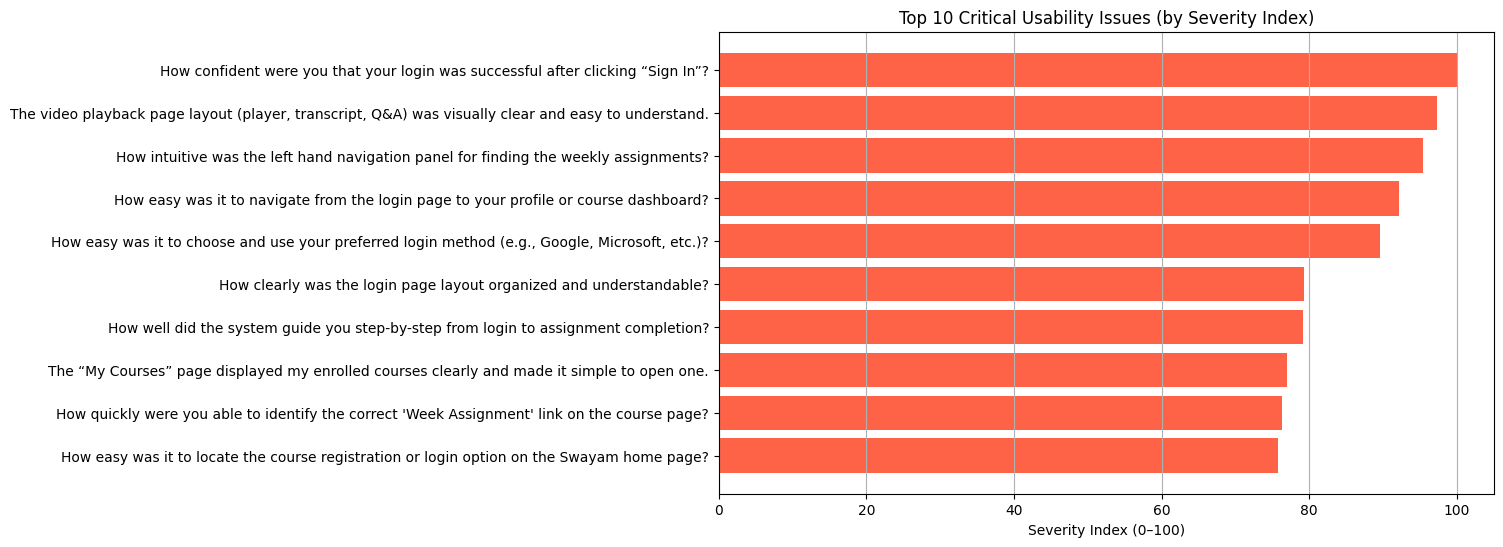


✅ Saved severity ranking as 'Usability_Severity_Index_Ranking.csv'


In [21]:
# ============================================================
# 9. Compute Severity Index for Each Usability Question
# ============================================================

# Step 1: Get predicted values for the entire dataset (using trained MLP)
all_pred = model.predict(X_pca).flatten()

# Undo normalization of target and predictions
y_actual_full = y * y.std() + y.mean()
y_pred_full = all_pred * y.std() + y.mean()

# Step 2: Attach predictions back to the dataframe
df_severity = X.copy()
df_severity['Actual_Severity'] = y_actual_full
df_severity['Predicted_Severity'] = y_pred_full

# Step 3: Compute Severity Index (normalized 0–100 scale)
# Formula: scale predicted usability severity values between 0–100
df_severity['Severity_Index'] = (
    100 * (df_severity['Predicted_Severity'] - df_severity['Predicted_Severity'].min()) /
    (df_severity['Predicted_Severity'].max() - df_severity['Predicted_Severity'].min())
)

# Step 4: Compute Severity Index per feature (question)
feature_severity = []
for i, col in enumerate(X.columns):
    # correlation of each feature with predicted severity (as a proxy)
    corr = np.corrcoef(X[col], df_severity['Severity_Index'])[0, 1]
    feature_severity.append((col, corr))

severity_summary = pd.DataFrame(feature_severity, columns=['Feature', 'Severity_Correlation'])
severity_summary['Severity_Index'] = (
    100 * (severity_summary['Severity_Correlation'] - severity_summary['Severity_Correlation'].min()) /
    (severity_summary['Severity_Correlation'].max() - severity_summary['Severity_Correlation'].min())
)

# Step 5: Sort & display
severity_summary = severity_summary.sort_values('Severity_Index', ascending=False).reset_index(drop=True)

print("\n🔥 Top 10 High-Severity Usability Issues:")
print(severity_summary.head(10))

# Step 6: Visualization
plt.figure(figsize=(10,6))
plt.barh(severity_summary['Feature'][:10][::-1], severity_summary['Severity_Index'][:10][::-1], color='tomato')
plt.xlabel("Severity Index (0–100)")
plt.title("Top 10 Critical Usability Issues (by Severity Index)")
plt.grid(axis='x')
plt.show()

# Step 7: Save
severity_summary.to_csv("Usability_Severity_Index_Ranking.csv", index=False)
print("\n✅ Saved severity ranking as 'Usability_Severity_Index_Ranking.csv'")
